https://dacon.io/competitions/official/235680/overview/description

Dacon 태양광 발전을보고 nn으로만 풀어보자

시각화해서 괜찮은 input으로만 구성하면 mlp로 해결할수 있지 않을까?

결과 : 어림도없음

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train/train.csv')
submission = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/sample_submission.csv')
df_test = []

test = df.copy()


#걍 마지막날 DHI만 가져가서 테스트해보자
for i in range(81):
    file_path = '/content/drive/My Drive/Colab Notebooks/data/test/' + str(i) + '.csv'
    temp = pd.read_csv(file_path)
    grouped = temp.groupby([	'Hour',	'Minute'	])
    
    df_test.append(grouped.mean()['DHI']+grouped.mean()['DNI'])
    df_test.append(grouped.mean()['DHI']+grouped.mean()['DNI'])


X_test = pd.concat(df_test)
X_test.shape

Mounted at /content/drive


##전천 일사량 구하기

In [ ]:
temp = df.copy()
temp['Day']

0           0
1           0
2           0
3           0
4           0
         ... 
52555    1094
52556    1094
52557    1094
52558    1094
52559    1094
Name: Day, Length: 52560, dtype: int64

In [ ]:
import math                    
pi = math.pi  


T = np.array([ 2*math.pi*i/365.0 for i in range(365)])
r= 0.006918-0.399912*np.cos(T*np.pi/180)+0.070257*np.sin(T*np.pi/180)-0.006768*np.cos(2*T*np.pi/180)+0.00907*np.sin(2*T*np.pi/180)-0.002697*np.cos(3*T*np.pi/180)+0.001480*np.sin(3*T*np.pi/180)

In [ ]:
def zenithal_angle_fun(d,h,m):
 return np.sin(r[d]*np.pi/180)*np.sin(37*np.pi/180)+np.cos(r[d]*np.pi/180)*np.cos(37*np.pi/180)*np.cos(37*np.pi/180)*np.sin(((360*(h%12)/12)+360*(m/60)*(1/12)*np.pi/180))

In [ ]:
zenithal_angle_fun(5,10,30)

-0.6237933221494932

In [ ]:
ghi = [ (test['Day'].values[i]+test['Hour'].values[i]+test['Minute'].values[i])    for i in range(len(test['Day'].values))]

In [ ]:
ghi = [ zenithal_angle_fun(test['Day'].values[i]%365,test['Hour'].values[i],test['Minute'].values[i])    for i in range(len(test['Day'].values))]

In [ ]:
test['GHI'] = ghi

In [ ]:
test

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET,ghi
0,0,0,0,0,0,1.5,69.08,-12,0.0,-0.004227
1,0,0,30,0,0,1.5,69.06,-12,0.0,0.160848
2,0,1,0,0,0,1.6,71.78,-12,0.0,-0.634397
3,0,1,30,0,0,1.6,71.75,-12,0.0,-0.587461
4,0,2,0,0,0,1.6,75.20,-12,0.0,-0.198636
...,...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0,0.049948
52556,1094,22,0,0,0,2.4,66.79,-4,0.0,-0.641741
52557,1094,22,30,0,0,2.2,66.78,-4,0.0,-0.623661
52558,1094,23,0,0,0,2.1,67.72,-4,0.0,-0.088526


In [ ]:
df_test

In [ ]:
submission

,id,q_0.1,q_0.2,q_0.3,q_0.4,q_0.5,q_0.6,q_0.7,q_0.8,q_0.9
0,0.csv_Day7_0h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.csv_Day7_0h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.csv_Day7_1h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.csv_Day7_1h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.csv_Day7_2h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
7771,80.csv_Day8_21h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7772,80.csv_Day8_22h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,80.csv_Day8_22h30m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,80.csv_Day8_23h00m,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df[10:20]

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
10,0,5,0,0,0,1.3,73.74,-11,0.000000
11,0,5,30,0,0,1.3,73.73,-11,0.000000
12,0,6,0,0,0,1.4,72.22,-12,0.000000
13,0,6,30,0,0,1.4,72.22,-12,0.000000
14,0,7,0,0,0,1.4,70.27,-12,0.000000
15,0,7,30,0,0,1.6,64.83,-10,0.000000
16,0,8,0,29,494,1.8,65.45,-9,7.039287
17,0,8,30,61,7,1.9,55.90,-7,5.912871
18,0,9,0,58,743,2.1,57.39,-6,22.337268
19,0,9,30,67,811,1.9,53.15,-4,29.469529


In [ ]:
df.describe()

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
count,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000,52560.000000
mean,547.000000,11.500000,15.000000,64.344121,234.792371,2.456033,56.793102,9.279928,17.790630
std,316.102148,6.922252,15.000143,103.897125,349.684583,1.426874,22.052875,10.179741,25.759955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.590000,-19.000000,0.000000
25%,273.000000,5.750000,0.000000,0.000000,0.000000,1.400000,39.697500,1.000000,0.000000
50%,547.000000,11.500000,15.000000,0.000000,0.000000,2.200000,57.600000,9.000000,0.000000
75%,821.000000,17.250000,30.000000,87.000000,469.000000,3.200000,72.770000,17.000000,32.089890
max,1094.000000,23.000000,30.000000,528.000000,1059.000000,12.000000,100.000000,35.000000,99.913939


##DHI가 0이면 Taget도 0

In [ ]:
temp = df[df['DHI'] == 0]['TARGET']
temp.sort_values(ascending=False)

52559    0.0
17293    0.0
17515    0.0
17516    0.0
17517    0.0
        ... 
35047    0.0
35048    0.0
35049    0.0
35050    0.0
0        0.0
Name: TARGET, Length: 26660, dtype: float64

DHI 0 인거 삭제

In [ ]:
print(test)
idx = test[test['DHI']==0].index
test.drop(idx,inplace=True)
test

        Day  Hour  Minute  DHI  DNI   WS     RH   T  TARGET
0         0     0       0    0    0  1.5  69.08 -12     0.0
1         0     0      30    0    0  1.5  69.06 -12     0.0
2         0     1       0    0    0  1.6  71.78 -12     0.0
3         0     1      30    0    0  1.6  71.75 -12     0.0
4         0     2       0    0    0  1.6  75.20 -12     0.0
...     ...   ...     ...  ...  ...  ...    ...  ..     ...
52555  1094    21      30    0    0  2.4  70.70  -4     0.0
52556  1094    22       0    0    0  2.4  66.79  -4     0.0
52557  1094    22      30    0    0  2.2  66.78  -4     0.0
52558  1094    23       0    0    0  2.1  67.72  -4     0.0
52559  1094    23      30    0    0  2.1  67.70  -4     0.0

[52560 rows x 9 columns]


,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
16,0,8,0,29,494,1.8,65.45,-9,7.039287
17,0,8,30,61,7,1.9,55.90,-7,5.912871
18,0,9,0,58,743,2.1,57.39,-6,22.337268
19,0,9,30,67,811,1.9,53.15,-4,29.469529
20,0,10,0,138,368,1.8,55.99,-3,25.339762
...,...,...,...,...,...,...,...,...,...
52541,1094,14,30,93,538,2.9,43.02,0,24.869688
52542,1094,15,0,73,516,2.8,46.51,0,19.426511
52543,1094,15,30,37,756,2.4,50.11,-2,17.080689
52544,1094,16,0,28,607,2.0,59.31,-4,9.197496


여러 데이터를 시각화해서 target과 연관있는걸 유추해보자


1. DHI TARGET
2. DNI TARGET
3. DHI








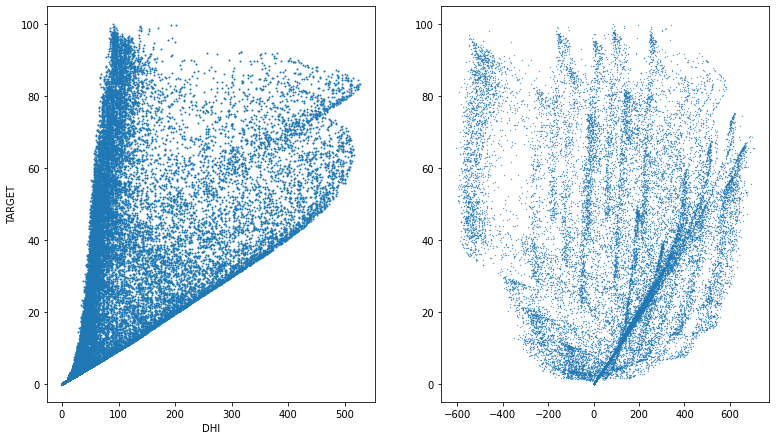

In [ ]:

fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
test['GR'] = test['DNI']*test['GHI']+test['DHI']
ax1.set_xlabel("DHI")
ax1.set_ylabel("TARGET")
ax1.scatter(test['DHI'],test['TARGET'],s=1)
ax2.scatter(test['GR'] ,test['TARGET'],s=0.1)

In [ ]:
#정규화 안한걸로 testing
import statsmodels.formula.api as smf   
mod = smf.quantreg('TARGET ~ 1+ (DNIDHI) +I(DNIDHI**2)', test) 
# mod = smf.quantreg('TARGET ~ DHI + I(DHI**2.0)', test) 
res = mod.fit(q=.9) 
# res = mod.fit(q=.9) 
print(res.summary())




# ## Build the model for other quantiles
quantiles = np.arange(0.1,1,0.1)
models = []
params = []

for qt in quantiles:
  qt = round(qt,1)
  res = mod.fit(q = qt )
  #temp = res.predict({'DNI+DHI':X_test}).map(lambda x:0 if x < 0.01 else x)
  models.append(res)
  params.append([qt, res.params['Intercept'], res.params['DNIDHI'],res.params['I(DNIDHI ** 2)']] + res.conf_int().loc['DNIDHI'].tolist())
  #submission[f'q_{qt}'] = temp.values

print(params)
params = pd.DataFrame(data = params, columns = ['qt','intercept','x_coef','x^2_coef','cf_lower_bound','cf_upper_bound'])

print (params)

                         QuantReg Regression Results                          
Dep. Variable:                 TARGET   Pseudo R-squared:               0.8420
Model:                       QuantReg   Bandwidth:                      0.9755
Method:                 Least Squares   Sparsity:                        2.124
Date:                Thu, 07 Jan 2021   No. Observations:                52560
Time:                        19:50:07   Df Residuals:                    52557
                                        Df Model:                            2
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -1.138e-08      0.010   -1.1e-06      1.000      -0.020       0.020
DNIDHI             0.0949   4.86e-05   1954.256      0.000       0.095       0.095
I(DNIDHI ** 2) -9.346e-06   4.45e-08   -210.235      0.000   -9.43e-06   -9.26e-06

The condition number is large, 

In [ ]:
#download csv
from google.colab import files
submission.to_csv('submission.csv', index=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

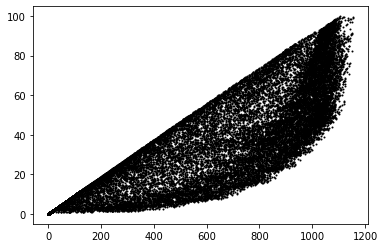

In [ ]:
plt.scatter(x_, y_,  color='black',s=1)


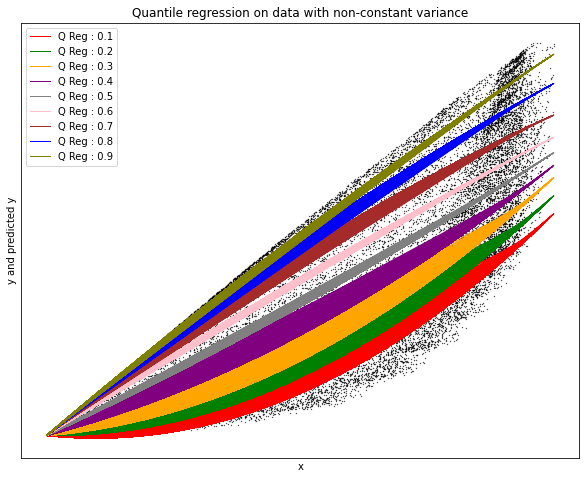

In [ ]:
import string
plt.figure(figsize=(10,8))
x_ = test['DNIDHI']
y_ = test['TARGET']
plt.scatter(x_, y_,  color='black',s=0.1)


y_pred=[]
colors = ['red','green','orange','purple','gray','pink','brown','blue','olive','cyan']
for i in range(9):
  y_pred.append(models[i].params['Intercept'] + models[i].params['DNIDHI'] * x_+ models[i].params['I(DNIDHI ** 2)']*(x_**2))
  plt.plot(x_, y_pred[i], color=colors[i],
      linewidth=1, label=f'Q Reg : 0.{i+1}')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

In [ ]:
test

,Day,Hour,Minute,DHI,DNI,WS,RH,T,TARGET
0,0,0,0,0,0,1.5,69.08,-12,0.0
1,0,0,30,0,0,1.5,69.06,-12,0.0
2,0,1,0,0,0,1.6,71.78,-12,0.0
3,0,1,30,0,0,1.6,71.75,-12,0.0
4,0,2,0,0,0,1.6,75.20,-12,0.0
...,...,...,...,...,...,...,...,...,...
52555,1094,21,30,0,0,2.4,70.70,-4,0.0
52556,1094,22,0,0,0,2.4,66.79,-4,0.0
52557,1094,22,30,0,0,2.2,66.78,-4,0.0
52558,1094,23,0,0,0,2.1,67.72,-4,0.0


In [ ]:
# 정규화 테스트
temp = test[["DHI","DNI","TARGET"]]
normalization_df = (temp - temp.mean())/temp.std()
normalization_df

,DHI,DNI,TARGET
0,-0.619306,-0.67144,-0.690631
1,-0.619306,-0.67144,-0.690631
2,-0.619306,-0.67144,-0.690631
3,-0.619306,-0.67144,-0.690631
4,-0.619306,-0.67144,-0.690631
...,...,...,...
52555,-0.619306,-0.67144,-0.690631
52556,-0.619306,-0.67144,-0.690631
52557,-0.619306,-0.67144,-0.690631
52558,-0.619306,-0.67144,-0.690631


In [ ]:
#정규화한거 reindex

dataset = normalization_df.sort_values(by="DHI").reset_index()

del dataset["index"]
#dataset["DHI^2"] = dataset["DHI"].pow(2)
#dataset["DNI^2"] = dataset["DNI"].pow(2)
# dataset = dataset.reindex(columns=['DHI','DNI','DHI^2','DNI^2','TARGET'])
dataset

,DHI,DNI,TARGET
0,-0.619306,-0.671440,-0.690631
1,-0.619306,-0.671440,-0.690631
2,-0.619306,-0.671440,-0.690631
3,-0.619306,-0.671440,-0.690631
4,-0.619306,-0.671440,-0.690631
...,...,...,...
52555,4.414519,0.375217,2.492659
52556,4.414519,0.449570,2.587140
52557,4.424144,0.398095,2.525191
52558,4.443394,0.400955,2.539724


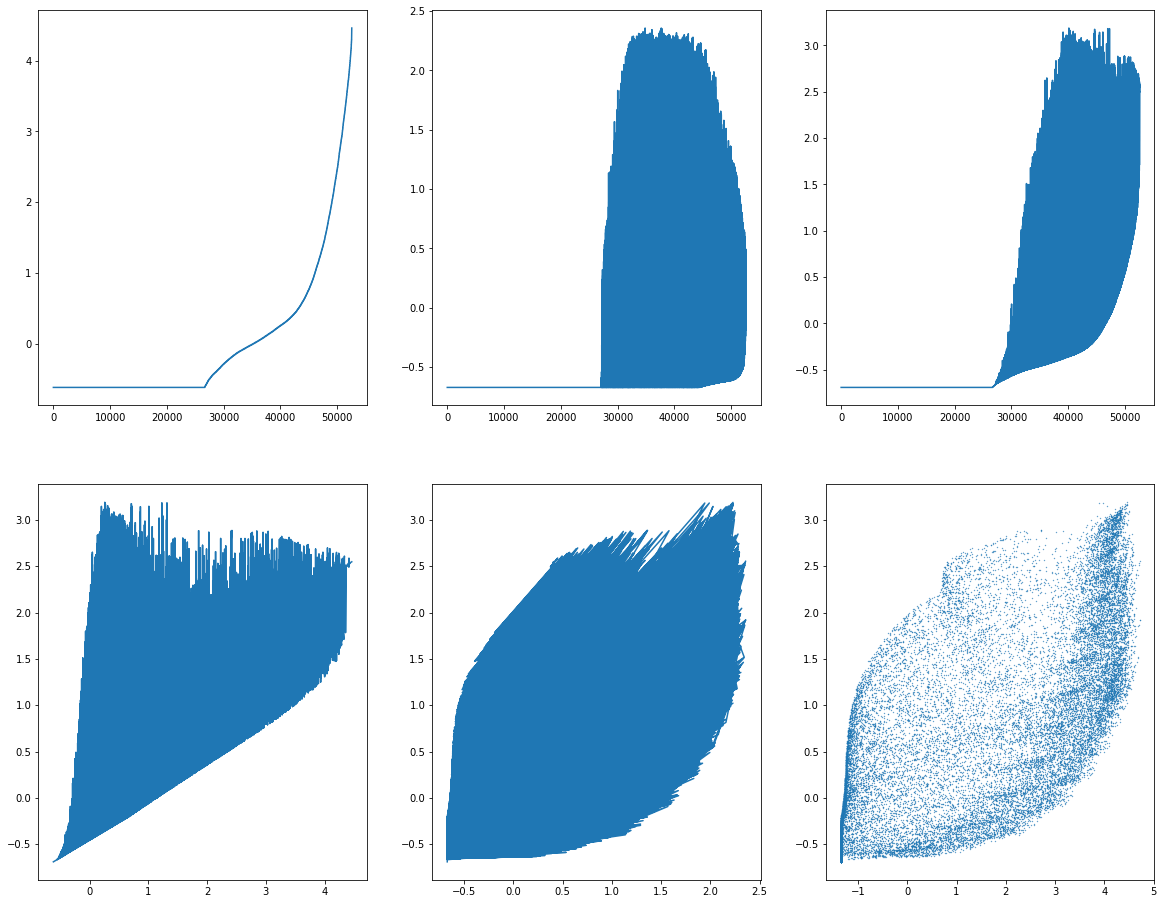

In [ ]:
fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)
ax1.plot(dataset['DHI'])
ax2.plot(dataset['DNI'])
ax3.plot(dataset['TARGET'])
ax4.plot(dataset['DHI'],dataset['TARGET'])
ax5.plot(dataset['DNI'],dataset['TARGET'])
ax6.scatter(dataset['DNI']+dataset['DNI'],dataset['TARGET'],s=0.1)

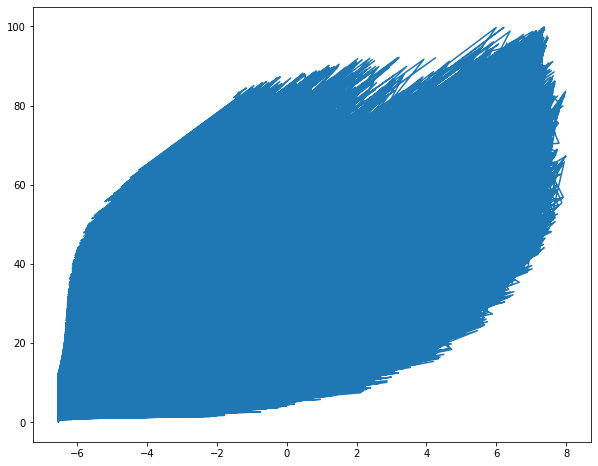

In [ ]:
fig = plt.figure(figsize=(10, 8))

plt.plot(4*dataset['DNI']+dataset['DNI'],dataset['TARGET'])

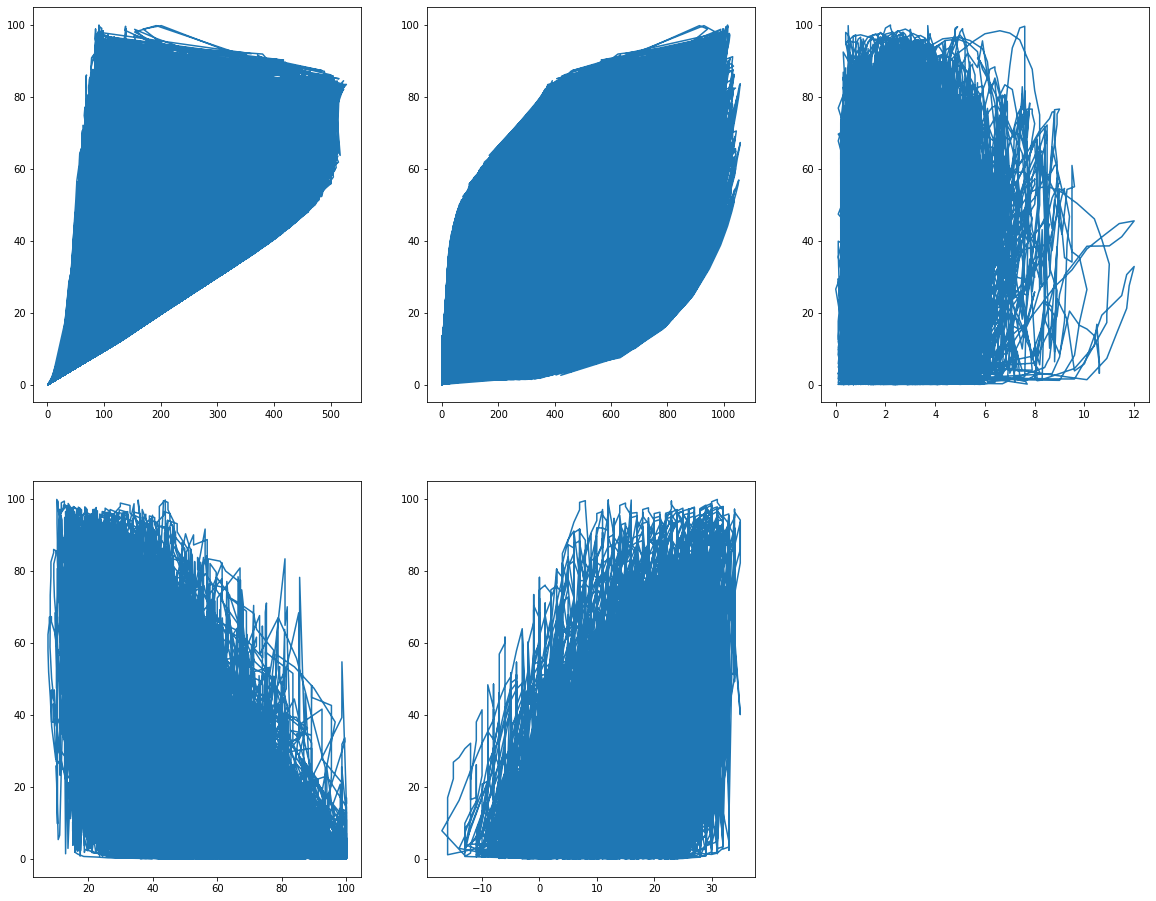

In [ ]:


fig = plt.figure(figsize=(20, 16))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax1.plot(test['DHI'],test['TARGET'])
ax2.plot(test['DNI'],test['TARGET'])
ax3.plot(test['WS'],test['TARGET'])
ax4.plot(test['RH'],test['TARGET'])
ax5.plot(test['T'],test['TARGET'])

## 선형회귀 

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [ ]:
dataset.dtypes

DHI       float64
DNI       float64
TARGET    float64
dtype: object

In [ ]:


# train = {}
# train["DHI"] = torch.from_numpy(dataset.values[:,0])
# train["DNI"] = torch.from_numpy(dataset.values[:,1])
# train["DNI"] = torch.from_numpy(dataset.values[:,1])
# train["TARGET"] = torch.from_numpy(dataset.values[:,2])
train = torch.from_numpy(dataset.values[:,:])
train[:,:4]


tensor([[-1.1254, -1.3066,  0.0938],
        [-1.1254, -1.3066,  0.0938],
        [-1.1254, -1.3066,  0.0938],
        ...,
        [ 3.4169, -0.2810, 82.8394],
        [ 3.4342, -0.2783, 83.2138],
        [ 3.4516, -0.2728, 83.4133]], dtype=torch.float64)

In [ ]:
# define the model
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2, 1)

    def forward(self, x):
        return self.fc1(x)

model = Net()


pinball loss

In [ ]:
class PinballLoss():
  def __init__(self, quantile=0.10, reduction='none'):
      self.quantile = quantile
      assert 0 < self.quantile
      assert self.quantile < 1
      self.reduction = reduction
  def __call__(self, output, target):
      assert output.shape == target.shape
      loss = torch.zeros_like(target, dtype=torch.float)
      error = output - target
      smaller_index = error < 0
      bigger_index = 0 < error
      loss[smaller_index] = self.quantile * (abs(error)[smaller_index])
      loss[bigger_index] = (1-self.quantile) * (abs(error)[bigger_index])

      if self.reduction == 'sum':
        loss = loss.sum()
      if self.reduction == 'mean':
        loss = loss.mean()

      return loss
    

In [ ]:
def my_loss(output, target):
    loss = torch.mean((output - target)**2)
    return loss
critersion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)


In [ ]:
#Training loop
for epoch in range(1000):
  # 1) Forward pass: Compute predicted y by passing x to the model
  y_pred = model(train[:,:2].float())

  # 2) Compute and print loss
  loss = critersion(y_pred, train[:,:3].float())
  print(f'Epoch: {epoch} | Loss: {loss.item()}')

  # Zero gradients, perform a backward pass, and update the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


#model을 만드는거랑 training 하는거랑은 별개의 이슈다 모델은 모델대로 만들고 모델을 학습하는데는 또 여러가지 방법이있다.




결과그래프

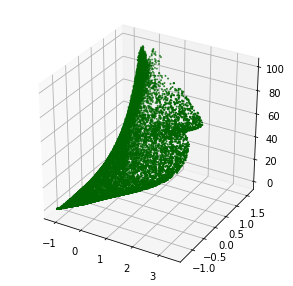

In [ ]:

from  mpl_toolkits.mplot3d import Axes3D

# 0 ~ 10 까지 랜덤으로 20개씩 생성
x =train[:,0]
y =train[:,1]
z =train[:,4]

# figure 크기 설정
# fig = plt.figure()만 사용해도 됨.
fig = plt.figure(figsize=(5, 5))

# 3D axes를 만들기 위해 projection=’3d’ 키워드를 입력해줍니다.
ax = fig.gca(projection='3d')

# scatter() 함수에 준비된 x, y, z 배열 값을 입력해주고 
# 마커, 스타일 및 마커 색상 등을 설정할 수 있습니다.
# marker = 점의 형태
# s = 점의 크기
# c = 점의 색깔
ax.scatter(x,y,z, marker='o', s=1, c='darkgreen')
plt.show()

In [ ]:
%matplotlib notebook 